In [226]:
%load_ext autoreload
%autoreload 2

import os, sys, time
import glob

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

#needed to import utils.py
sys.path.append('../') 

import utils
import utils_preprocessing
import utils_exec_models
import utils_exec_models_new

import numpy as np
import pandas as pd
#to view entire text of the comuns
pd.set_option('display.max_colwidth', None) 

import sklearn as sk

import matplotlib.pyplot as plt
import seaborn as sns


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Get the folders containing the results CSV files

In [231]:
# get current folder
path = os.path.abspath('')

# get the folders containg the results csv files
folders_results = []
for root, folders, files in os.walk(path, topdown=False):
    
#     for name in files:
#         print(os.path.join(root, name))

    for name in folders:
        
        if name.startswith('exec_results_'):

            # get scenario info
            if 'Single_Model' in name:
                scenario = 'Single Model'
            elif 'Ensemble_Imbalance' in name:
                scenario = 'Ensemble-Imbalance'
            else:
                scenario = '[UNDEFINED]'

            # get Features info
            if 'All_Features' in name:
                features = 'All Features'
            elif 'without_Diagnosis_Delay' in name:
                features = 'Without Diagnosis_Delay'
            else:
                feautures = '[UNDEFINED]'

            # store result folder    
            folders_results.append(
                [
                    scenario,
                    features,
                    os.path.join(root, name),
                ]
            )
        
folders_results = sorted(folders_results)

folders_results

[['Ensemble-Imbalance',
  'All Features',
  '/home/papaiz/python-projects/_my_thesis/als_prognosis_using_ensemble_imbalance/05_Train_Validate_Models/exec_results_Ensemble_Imbalance_All_Features'],
 ['Ensemble-Imbalance',
  'All Features',
  '/home/papaiz/python-projects/_my_thesis/als_prognosis_using_ensemble_imbalance/05_Train_Validate_Models/exec_results_Ensemble_Imbalance_All_Features_using_top_bests'],
 ['Ensemble-Imbalance',
  'Without Diagnosis_Delay',
  '/home/papaiz/python-projects/_my_thesis/als_prognosis_using_ensemble_imbalance/05_Train_Validate_Models/exec_results_Ensemble_Imbalance_without_Diagnosis_Delay'],
 ['Ensemble-Imbalance',
  'Without Diagnosis_Delay',
  '/home/papaiz/python-projects/_my_thesis/als_prognosis_using_ensemble_imbalance/05_Train_Validate_Models/exec_results_Ensemble_Imbalance_without_Diagnosis_Delay_using_top_bests'],
 ['Single Model',
  'All Features',
  '/home/papaiz/python-projects/_my_thesis/als_prognosis_using_ensemble_imbalance/05_Train_Validate_

# Get all results CSV file, separating by _Top-Results_ (each algorithm) and _Best_Results_ (overall)

In [228]:
# get the folders containg the results csv files
results_files = []

top_results_by_algorithm = []

best_results_all_algorithm = []

for scenario, features, folder in folders_results:

    for root, folders, files in os.walk(folder, topdown=False):

        for name in files:
            if name.endswith('.csv'):

                if name.startswith('top_results_'):
                    top_results_by_algorithm.append(
                        [
                            scenario,
                            features,
                            os.path.join(root, name),
                        ]
                    )

                elif name.startswith('_best_results_'):
                    best_results_all_algorithm.append(
                        [
                            scenario,
                            features,
                            os.path.join(root, name),
                        ]
                    )


print(top_results_by_algorithm)
print(best_results_all_algorithm)

[['Ensemble-Imbalance', 'All Features', '/home/papaiz/python-projects/_my_thesis/als_prognosis_using_ensemble_imbalance/05_Train_Validate_Models/exec_results_Ensemble_Imbalance_All_Features/top_results_BalancedBaggingClassifier_KNeighborsClassifier.csv'], ['Ensemble-Imbalance', 'All Features', '/home/papaiz/python-projects/_my_thesis/als_prognosis_using_ensemble_imbalance/05_Train_Validate_Models/exec_results_Ensemble_Imbalance_All_Features/top_results_BalancedBaggingClassifier_RandomForestClassifier.csv'], ['Ensemble-Imbalance', 'All Features', '/home/papaiz/python-projects/_my_thesis/als_prognosis_using_ensemble_imbalance/05_Train_Validate_Models/exec_results_Ensemble_Imbalance_All_Features/top_results_BalancedBaggingClassifier_RadiusNeighborsClassifier.csv'], ['Ensemble-Imbalance', 'All Features', '/home/papaiz/python-projects/_my_thesis/als_prognosis_using_ensemble_imbalance/05_Train_Validate_Models/exec_results_Ensemble_Imbalance_All_Features/top_results_BalancedBaggingClassifier_

# Get the 3 best performance for each $scenario$ and $features$

In [229]:
df_all = None
for scenario, features, csv_file in best_results_all_algorithm:
#     utils.print_string_with_separators(f'{scenario} - {features}')
    df_temp = utils.read_csv(csv_file=csv_file)
    # get first 3 results
    df_temp = df_temp.head(3)
#     display(df_temp)
#     utils.print_array_as_list(df_temp.columns)
    df_temp.insert(loc=0, column='Scenario_Features', value=f'{scenario} - {features}')
    df_temp.insert(loc=1, column='Scenario', value=scenario)
    df_temp.insert(loc=2, column='Features', value=features)
    
    if 'Estimator' in df_temp.columns:
        df_temp.insert(loc=3, column='Config', value=str(df_temp.Estimator).split('(')[0].replace('0', '') + ' (EI)') 
    else:
        df_temp.insert(loc=3, column='Config', value=df_temp.Model_Class + ' (SM)') 

    # acumulate the performances
    if df_all is None:
        df_all = df_temp
    else:
        df_all = pd.concat([df_all, df_temp])

    
df_all = utils_exec_models_new.sort_performances_results(df=df_all)    
display(df_all)

,Scenario_Features,Scenario,Features,Config,Model,balanced_accuracy,sensitivity,specificity,f1_score,AUC,accuracy,precision,Model_Class,Hyperparams,Estimator,fit_time
0,Ensemble-Imbalance - All Features,Ensemble-Imbalance,All Features,RandomForestClassifier (EI),Balanced Bagging,0.87,0.91,0.82,0.56,0.93,0.83,0.40,BalancedBaggingClassifier,"{'n_estimators': 7, 'random_state': 42, 'sampling_strategy': 'all', 'warm_start': False}","RandomForestClassifier(class_weight='balanced', criterion='entropy', max_depth=5, n_estimators=51, random_state=42)",0.05
0,Ensemble-Imbalance - All Features,Ensemble-Imbalance,All Features,MLPClassifier (EI),Balanced Bagging,0.86,0.94,0.79,0.54,0.93,0.81,0.38,BalancedBaggingClassifier,"{'bootstrap': True, 'n_estimators': 25, 'oob_score': False, 'random_state': 42, 'replacement': True, 'sampling_strategy': 'all', 'warm_start': False}","MLPClassifier(activation='tanh', alpha=0.1, hidden_layer_sizes=(23,), learning_rate='adaptive', learning_rate_init=0.7, max_iter=2000, random_state=42)",0.01
1,Ensemble-Imbalance - All Features,Ensemble-Imbalance,All Features,MLPClassifier (EI),Balanced Bagging,0.86,0.94,0.79,0.54,0.93,0.81,0.38,BalancedBaggingClassifier,"{'bootstrap': True, 'n_estimators': 25, 'oob_score': False, 'random_state': 42, 'replacement': True, 'sampling_strategy': 'all', 'warm_start': False}","MLPClassifier(activation='tanh', alpha=0.1, hidden_layer_sizes=(23,), learning_rate_init=0.7, max_iter=2000, random_state=42)",0.01
2,Ensemble-Imbalance - All Features,Ensemble-Imbalance,All Features,MLPClassifier (EI),Balanced Bagging,0.86,0.94,0.79,0.54,0.93,0.81,0.38,BalancedBaggingClassifier,"{'bootstrap': True, 'n_estimators': 21, 'oob_score': False, 'random_state': 42, 'replacement': False, 'sampling_strategy': 'all', 'warm_start': True}","MLPClassifier(alpha=0.5, hidden_layer_sizes=30, learning_rate_init=0.5, max_iter=2000, random_state=42, solver='sgd')",0.01
1,Ensemble-Imbalance - All Features,Ensemble-Imbalance,All Features,RandomForestClassifier (EI),Balanced Bagging,0.86,0.89,0.82,0.56,0.93,0.83,0.41,BalancedBaggingClassifier,"{'n_estimators': 25, 'random_state': 42, 'sampling_strategy': 'auto', 'warm_start': True}","DecisionTreeClassifier(class_weight='balanced', max_depth=4, random_state=42)",0.01
0,Single Model - All Features,Single Model,All Features,RandomForestClassifier (SM),Random Forest,0.86,0.87,0.86,0.59,0.92,0.86,0.45,RandomForestClassifier,"{'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 51, 'random_state': 42}",NaN,0.01
2,Ensemble-Imbalance - All Features,Ensemble-Imbalance,All Features,RandomForestClassifier (EI),Balanced Bagging,0.86,0.87,0.85,0.58,0.93,0.85,0.44,BalancedBaggingClassifier,"{'n_estimators': 7, 'random_state': 42, 'sampling_strategy': 'all', 'warm_start': False}","MLPClassifier(activation='tanh', alpha=0.5, hidden_layer_sizes=(23,), learning_rate_init=0.7, max_iter=2000, random_state=42, solver='sgd')",0.01
1,Single Model - All Features,Single Model,All Features,SVC (SM),SVM,0.85,0.89,0.81,0.54,0.93,0.82,0.39,SVC,"{'C': 0.7, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'linear', 'probability': True, 'random_state': 42}",NaN,0.01
0,Ensemble-Imbalance - Without Diagnosis_Delay,Ensemble-Imbalance,Without Diagnosis_Delay,MLPClassifier (EI),Balanced Bagging,0.84,0.91,0.77,0.51,0.89,0.79,0.35,BalancedBaggingClassifier,"{'bootstrap': True, 'n_estimators': 7, 'oob_score': False, 'random_state': 42, 'replacement': False, 'sampling_strategy': 'all', 'warm_start': False}","MLPClassifier(alpha=0.5, hidden_layer_sizes=(22, 44, 44, 22), learning_rate_init=0.3, max_iter=2000, random_state=42, solver='sgd')",0.03
0,Single Model - Without Diagnosis_Delay,Single Model,Without Diagnosis_Delay,SVC (SM),SVM,0.84,0.89,0.79,0.52,0.89,0.80,0.37,SVC,"{'C': 0.1, 'class_weight': 'balanced', 'gamma': 'auto', 'kernel': 'linear', 'probability': True, 'random_state': 42}",NaN,0.01


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 500x500 with 0 Axes>

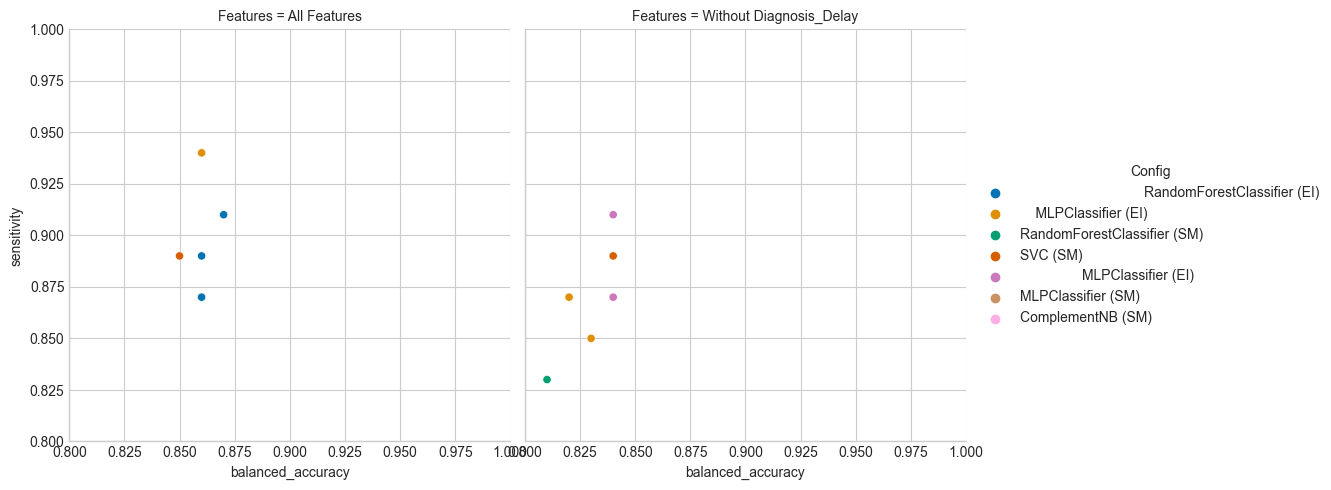

In [230]:
# Plot the lines on two facets
plt.figure(figsize=(5,5))
sns.relplot(
    data=df_all,
    y="sensitivity",
    x="balanced_accuracy", 
    hue="Config", 
#     size="choice", 
    col="Features",
#     kind="line", 
#     size_order=["T1", "T2"], 
    palette='colorblind',
#     height=5, 
#     aspect=.75, 
#     facet_kws=dict(sharex=False),
)
# plt.legend(loc='upper right')
plt.ylim(0.8, 1.0)
plt.xlim(0.8, 1.0)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


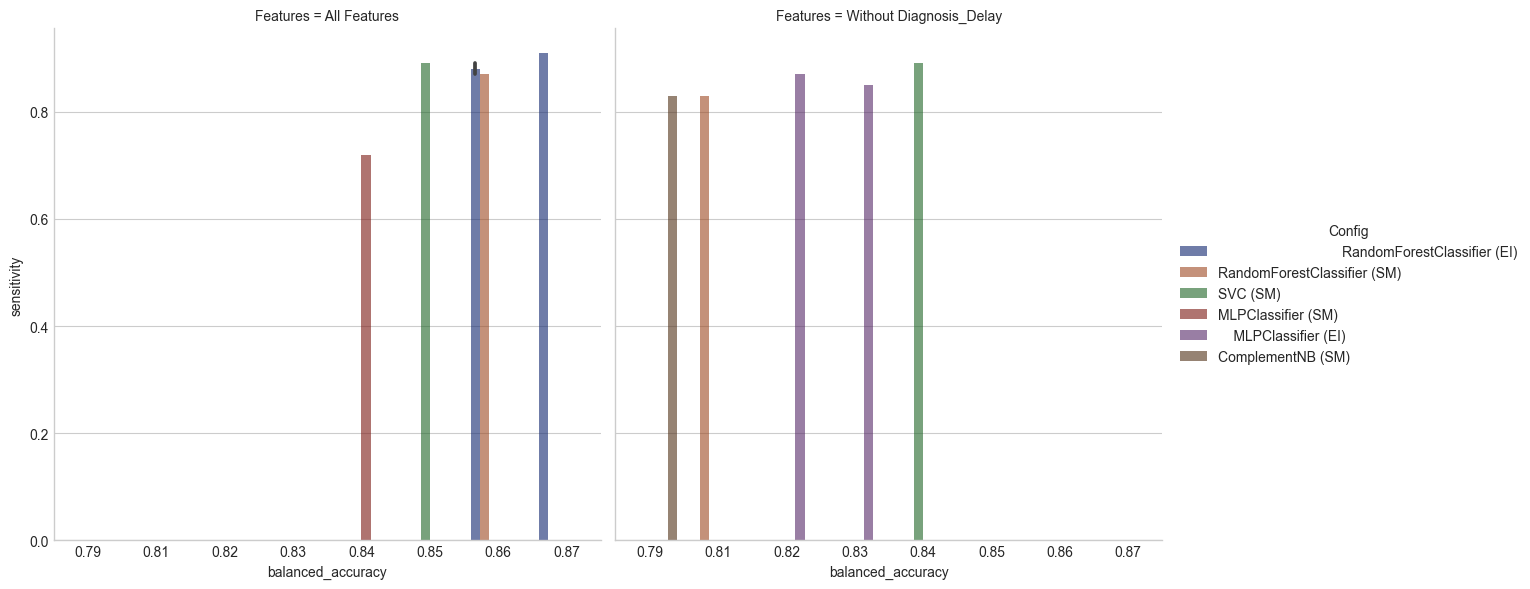

In [222]:
# Draw a nested barplot by species and sex
g = sns.catplot(
    data=df_all, 
    kind="bar",
    y="sensitivity",
    x="balanced_accuracy", 
    hue="Config", 
    col='Features',
#     errorbar="sd", 
    palette="dark", 
    alpha=.6, 
    height=6
)
# g.despine(left=True)
# g.set_axis_labels("", "Body mass (g)")
# g.legend.set_title("")

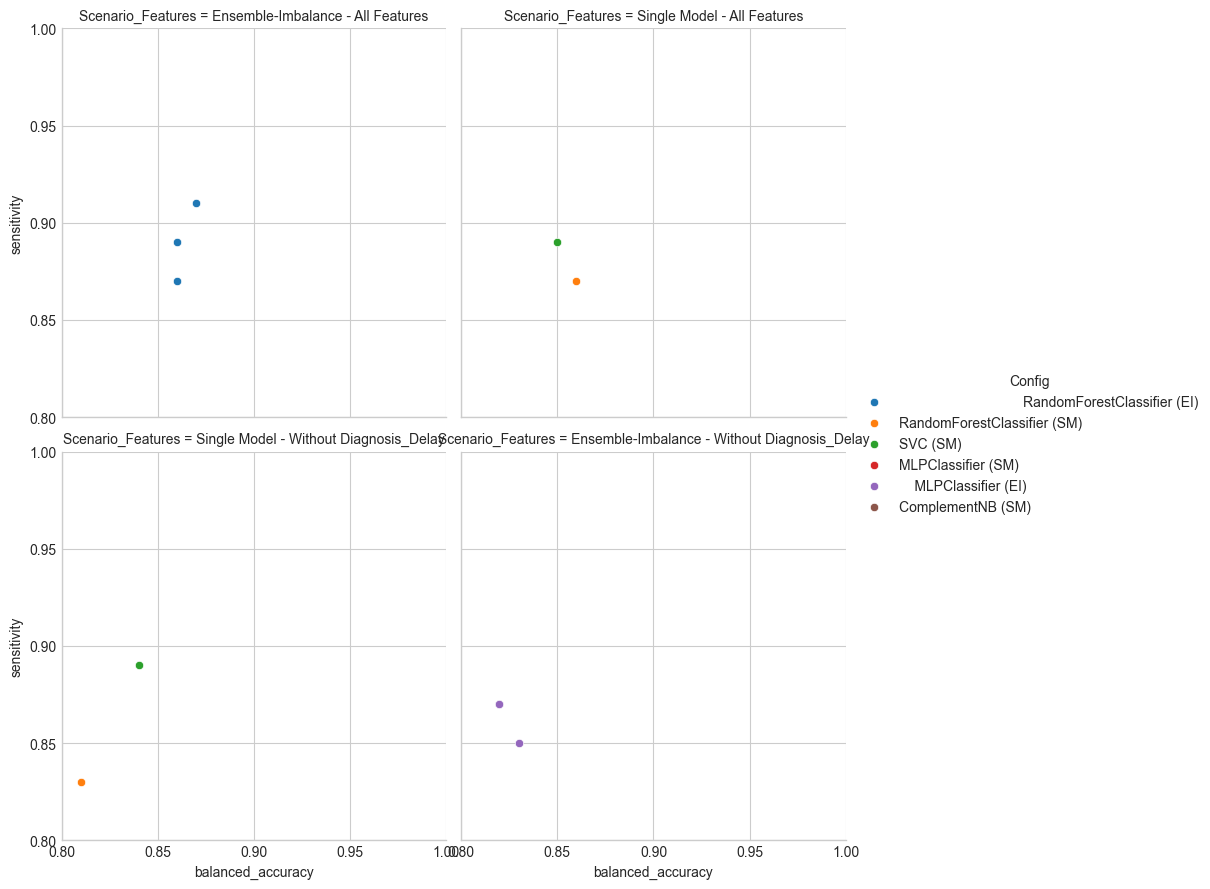

In [224]:
# Initialize a grid of plots with an Axes for each walk
grid = sns.FacetGrid(
    df_all, 
    col="Scenario_Features", 
    hue="Config", 
#     palette="tab20c",
    col_wrap=2, 
    height=4.5,
#     legend_out=True
)

# plt.xlim(0.80, 1.0)

# Draw a horizontal line to show the starting point
# grid.refline(y=df_all.sensitivity.max(), linestyle=":", c='red', alpha=0.3, label='')
# grid.refline(x=df_all.balanced_accuracy.max(), linestyle=":", c='red', alpha=0.3)

# Draw a line plot to show the trajectory of each random walk
grid.map(
    sns.scatterplot, 
    "balanced_accuracy", 
    "sensitivity", 
    marker="o",
    
)

# Adjust the tick positions and labels
grid.set(
    xticks=np.arange(0.8, 1.01, .05), 
    yticks=np.arange(0.8, 1.01, .05),
    xlim=(0.80, 1.0), 
    ylim=(0.80, 1.0)
)

grid.add_legend()

# Adjust the arrangement of the plots
# grid.fig.tight_layout(w_pad=1)

In [148]:
np.arange(0.8, 1.01, .05)

array([0.8 , 0.85, 0.9 , 0.95, 1.  ])

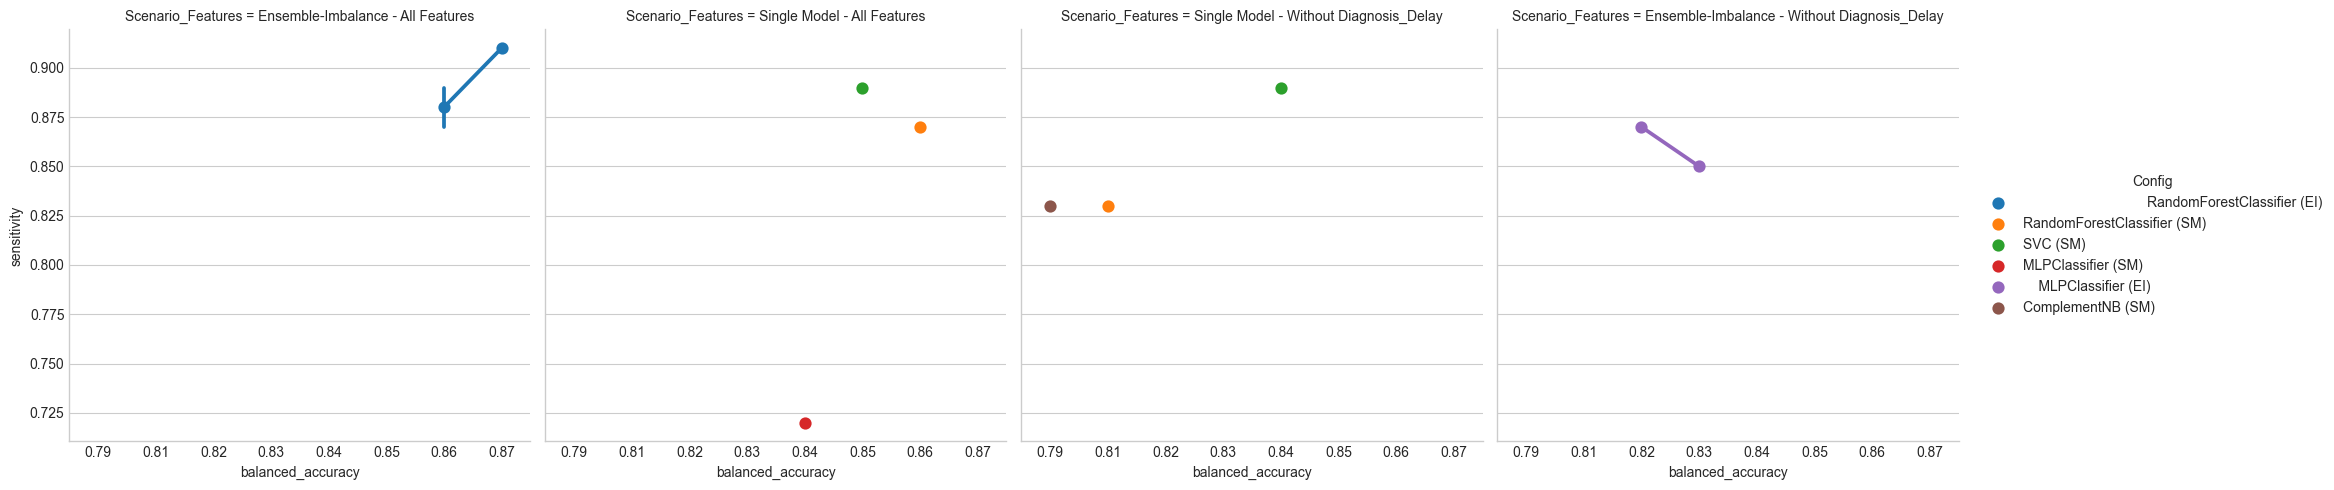

In [225]:
# fig, ax = plt.subplots()

g = sns.catplot(
    data=df_all, 
    x="balanced_accuracy", 
    y="sensitivity", 
    col="Scenario_Features", 
    hue="Config",
#     capsize=.2, 
#     palette="YlGnBu_d", 
#     errorbar="se",
    kind="point", 
#     height=6, 
#     aspect=.5,
    
#     sharex=True,
#     sharey=True,
#     col_wrap=3,
)

# for i, ax in enumerate(g.axes.flat):  # set every-other axis for testing purposes
#     ax.set_xlim(0., 1.)
# #     pass

# g.despine(left=True)

# g.set(ylim=(0.8 ,1))
# g.set_xlim(.8, .9, 1.)

# g.set(xlim=(0.8 ,1))

# plt.ylim(.8, 1.)
# plt.xlim(.8, 1.)

# g.set(ylim=( 0., 1.), xlim=( 0., 1.))
# axes[0,1].set_ylim(0,)
# plt.show()